# Artificial Neural Network

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

## Part 1 - Data Preprocessing

### Importing the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_excel('/content/drive/MyDrive/Udemy/Deep Learning A-Z/Datasets/Deep Learning A-Z/Part 1 - Artificial Neural Networks (ANN)/Combined_Cycle_Power_Plant.xlsx')

Mounted at /content/drive


In [ ]:
dataset.tail(5)

,AT,V,AP,RH,PE
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


In [ ]:

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)
print(y)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]
[463.26 444.37 488.56 ... 429.57 435.74 453.28]


# Feature Scaling

*   Since features are continuous numerical values, and measured in different units and ranges. Feature scaling should be used here to prevent larger ranges, such as AP, from dominating the learning process.


Therefore, in this case, feature scaling for all features includes the targe, but needs to do the inverse after prediction.





In [ ]:
from os import sched_yield
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)

sc_y = StandardScaler()
y_scaled = sc_y.fit_transform(y.reshape(len(y),1))


In [ ]:
print("feature scaled: ", X_scaled)
print("target scaled: ", y_scaled)

feature scaled:  [[-0.62951938 -0.98729659  1.8204884  -0.00951935]
 [ 0.74190911  0.68104512  1.1418628  -0.97462052]
 [-1.95129733 -1.17301765 -0.18507756  1.2898397 ]
 ...
 [ 1.56583973  1.57581141 -0.05709854 -2.52261812]
 [ 0.64797565  1.19177803  0.1011913  -0.74790051]
 [ 0.26150656  0.64641916  0.66867722 -0.37254534]]
target scaled:  [[ 0.52120807]
 [-0.58566442]
 [ 2.00367889]
 ...
 [-1.45288056]
 [-1.09134518]
 [-0.06357687]]


### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 0)

## Part 2 - Building the ANN

### Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))

## Part 3 - Training the ANN

### Compiling the ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'mae', metrics = ['mae', 'mse'])

### Training the ANN model on the Training set

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4907 - mae: 0.4907 - mse: 0.4419
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2828 - mae: 0.2828 - mse: 0.1330
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2452 - mae: 0.2452 - mse: 0.1000
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2317 - mae: 0.2317 - mse: 0.0904
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2123 - mae: 0.2123 - mse: 0.0743
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2033 - mae: 0.2033 - mse: 0.0700
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2038 - mae: 0.2038 - mse: 0.0747
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1999 - mae: 0.1999 - mse: 0.0690
Epoch 9/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1958 - mae: 0.1958 - mse: 0.0631
Epoch 10/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1985 - mae: 0.1985 - mse: 0.0647
Epoch 11/100
240/240 ━━━━━━━━━━━━━━━━━━

### Predicting the results of the Test set

In [ ]:
y_pred_scaled = ann.predict(X_test)

y_pred = sc_y.inverse_transform(y_pred_scaled)
y_actual = sc_y.inverse_transform(y_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [ ]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_actual.reshape(len(y_actual),1)),1))

[[432.3  431.23]
 [459.69 460.01]
 [462.82 461.14]
 ...
 [469.   473.26]
 [439.39 438.  ]
 [462.27 463.28]]



# Evaluate with MAE and MSE


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_actual, y_pred)
mse = mean_squared_error(y_actual, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")


MAE: 3.15
MSE: 16.59


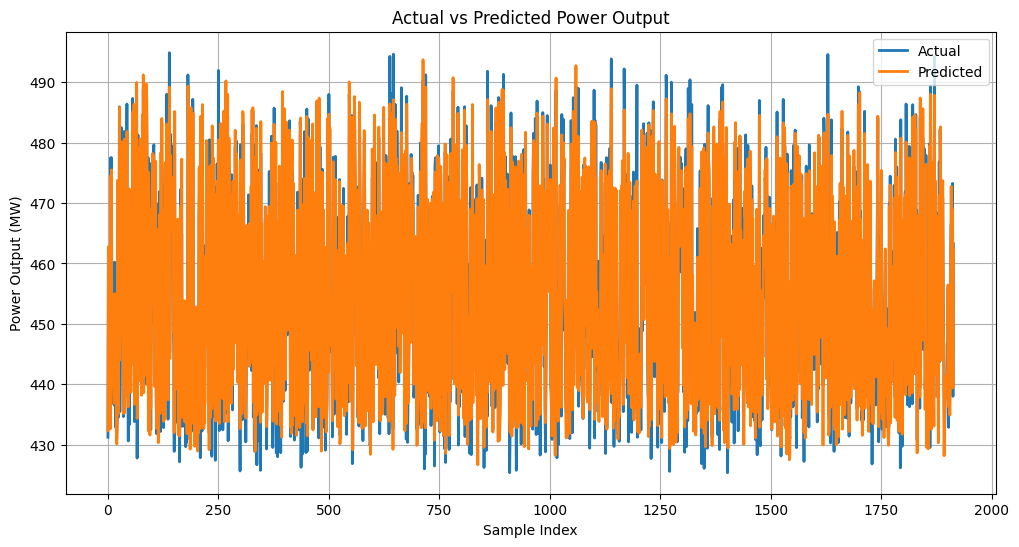

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_actual, label='Actual', linewidth=2)
plt.plot(y_pred, label='Predicted', linewidth=2)
plt.title('Actual vs Predicted Power Output')
plt.xlabel('Sample Index')
plt.ylabel('Power Output (MW)')
plt.legend()
plt.grid(True)
plt.show()
